## Load packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')

C:\Users\Victo\AppData\Local\Temp\ipykernel_9188\3818186681.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
df = pd.read_csv('data_cleaned.csv')

# indicate dummy features
df.iloc[:,19:99] = df.iloc[:,19:99].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 99 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   income_am               4947 non-null   float64 
 1   profit_last_am          4947 non-null   float64 
 2   profit_am               4947 non-null   float64 
 3   damage_am               4947 non-null   float64 
 4   crd_lim_rec             4947 non-null   float64 
 5   cab_requests            4947 non-null   int64   
 6   bar_no                  4947 non-null   int64   
 7   neighbor_income         4947 non-null   float64 
 8   age                     4947 non-null   int64   
 9   tenure_mts              4947 non-null   int64   
 10  tenure_yrs              4947 non-null   int64   
 11  claims_am               4947 non-null   float64 
 12  nights_booked           4947 non-null   int64   
 13  shop_am                 4947 non-null   int64   
 14  outcome_profit          

In [3]:
# Dropping the features that need to be predicted EXCEPT the feature 'outcome_damage_inc'.
df = df.drop(['outcome_profit', 'outcome_damage_amount'], axis=1)

In [4]:
df['outcome_damage_inc'].value_counts()

0    3682
1    1265
Name: outcome_damage_inc, dtype: int64

# Train test split and standardisation

### shuffle

In [5]:
from random import Random
df_shuffle = df.sample(frac=1, random_state=123)

### Train/test-split

In [6]:
# Import the function
from sklearn.model_selection import train_test_split

# Split of feaures and outcomes
X = df_shuffle.drop(['outcome_damage_inc'],1)
y = df_shuffle['outcome_damage_inc']


# train/split in training and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
# train/split in training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=4321)

C:\Users\Victo\AppData\Local\Temp\ipykernel_9188\2116912031.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df_shuffle.drop(['outcome_damage_inc'],1)


### standardise

In [7]:
from sklearn.preprocessing import StandardScaler

num_feat = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

scaler.fit(X_train[num_feat])

X_train_stand = X_train.copy()
X_trainval_stand = X_train_val.copy()
X_val_stand = X_val.copy()
X_test_stand = X_test.copy()


X_train_stand[num_feat] = scaler.fit_transform(X_train_stand[num_feat])

X_val_stand[num_feat] = scaler.transform(X_val_stand[num_feat])
X_trainval_stand[num_feat] = scaler.transform(X_trainval_stand[num_feat])

X_test_stand[num_feat] = scaler.transform(X_test_stand[num_feat])

In [8]:
X_test_stand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 3408 to 1140
Data columns (total 96 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   income_am               990 non-null    float64 
 1   profit_last_am          990 non-null    float64 
 2   profit_am               990 non-null    float64 
 3   damage_am               990 non-null    float64 
 4   crd_lim_rec             990 non-null    float64 
 5   cab_requests            990 non-null    float64 
 6   bar_no                  990 non-null    float64 
 7   neighbor_income         990 non-null    float64 
 8   age                     990 non-null    float64 
 9   tenure_mts              990 non-null    float64 
 10  tenure_yrs              990 non-null    float64 
 11  claims_am               990 non-null    float64 
 12  nights_booked           990 non-null    float64 
 13  shop_am                 990 non-null    float64 
 14  pos_mean_scores       

# Algorithms

Almost all algorithms from the regression setting can also be used as a classifier in Sklearn

# Logistic regression classifier

Train a logistic model

In [9]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=10000, max_iter=200) 
logreg.fit(X_train_stand, y_train)

c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10000, max_iter=200)

Test both the train and validation dataset

In [10]:
print(logreg.score(X_train_stand, y_train)) # training set
print(logreg.score(X_val_stand, y_val)) # validation set

0.764612954186414
0.7361111111111112


Evaluate the model

In [11]:
# predict the outcomes for the validation dataset
y_val_pred = logreg.predict(X_val_stand)
y_val_pred_prob = logreg.predict_proba(X_val_stand)

In [12]:
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(confusion_matrix)


[[548  29]
 [180  35]]


In [14]:
# print the classification report (NIPTest)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       577
           1       0.55      0.16      0.25       215

    accuracy                           0.74       792
   macro avg       0.65      0.56      0.55       792
weighted avg       0.70      0.74      0.68       792



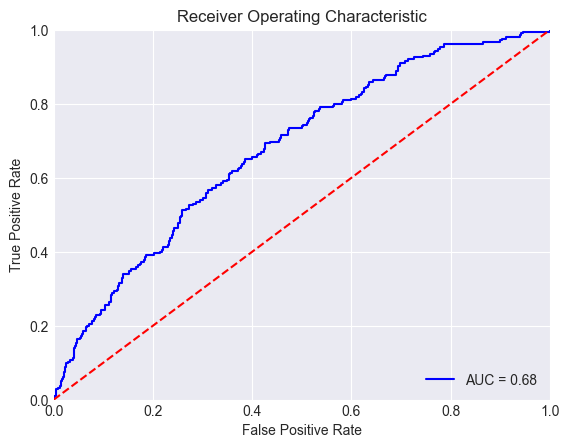

In [15]:
# print the ROC-curve

import sklearn.metrics as metrics
preds = y_val_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Calibration

check the calibration

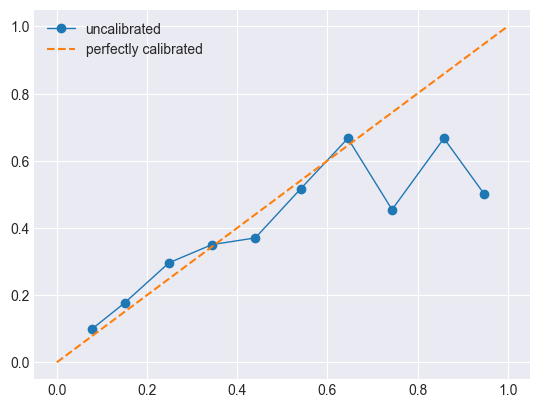

In [16]:
from sklearn.calibration import calibration_curve

y_pred_val_prob = logreg.predict_proba(X_val_stand)

fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()

calibrate model

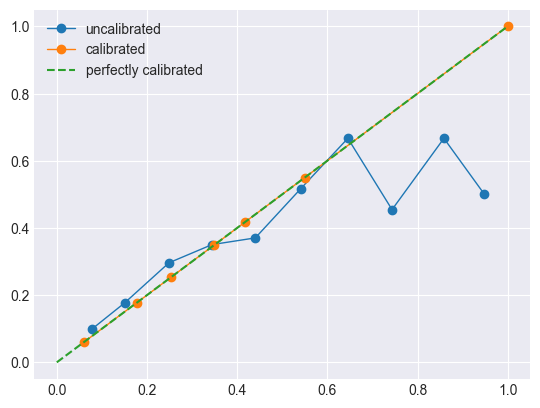

In [17]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

isotonic = CalibratedClassifierCV(logreg, cv='prefit', method='isotonic')
isotonic.fit(X_val_stand, y_val)

y_val_pred_prob_c = isotonic.predict_proba(X_val_stand)
fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()
plt.show()

construct the classification report for the calibrated model

In [18]:
y_pred = logreg.predict(X_val_stand)
y_pred_c = isotonic.predict(X_val_stand)

print(classification_report(y_val, y_pred))
print(classification_report(y_val, y_pred_c))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       577
           1       0.55      0.16      0.25       215

    accuracy                           0.74       792
   macro avg       0.65      0.56      0.55       792
weighted avg       0.70      0.74      0.68       792

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       577
           1       0.56      0.16      0.25       215

    accuracy                           0.74       792
   macro avg       0.66      0.56      0.55       792
weighted avg       0.70      0.74      0.68       792



Fit and calibrate the model at the same time

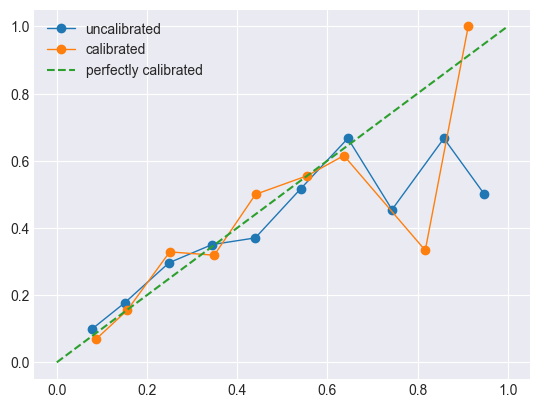

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       577
           1       0.56      0.16      0.25       215

    accuracy                           0.74       792
   macro avg       0.66      0.56      0.55       792
weighted avg       0.70      0.74      0.68       792

              precision    recall  f1-score   support

           0       0.74      0.97      0.84       577
           1       0.55      0.10      0.17       215

    accuracy                           0.73       792
   macro avg       0.65      0.53      0.50       792
weighted avg       0.69      0.73      0.66       792



In [19]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
logreg2 = LogisticRegression(C=10000, max_iter=1000) 
isotonic2 = CalibratedClassifierCV(logreg2, cv=3, method='isotonic')
isotonic2.fit(X_train_stand, y_train)


# The calibration plot
y_val_pred_prob_c2 = isotonic2.predict_proba(X_val_stand)

fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c2[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()
plt.show()

y_pred_c2 = isotonic2.predict(X_val_stand)

print(classification_report(y_val, y_pred_c))
print(classification_report(y_val, y_pred_c2))

# Polynomials and penalisation

Design the polynomial features 

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_stand)
X_trainval_poly = poly.transform(X_trainval_stand)
X_val_poly = poly.transform(X_val_stand)

Do randomized search

In [21]:
from sklearn.model_selection import RandomizedSearchCV

C = [round(x,5) for x in np.linspace(start = 0.0001, stop = 10, num = 1000)]
random_grid = {'C': C}

logreg = LogisticRegression(max_iter=1000) 
log_random = RandomizedSearchCV(estimator=logreg, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=1234)

log_random.fit(X_train_poly, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.01011, 0.02012, 0.03013,
                                              0.04014, 0.05015, 0.06016,
                                              0.07017, 0.08018, 0.09019, 0.1002,
                                              0.11021, 0.12022, 0.13023,
                                              0.14024, 0.15025, 0.16026,
                                              0.17027, 0.18028, 0.19029, 0.2003,
                                              0.21031, 0.22032, 0.23033,
                                              0.24034, 0.25035, 0.26036,
                                              0.27037, 0.28038, 0.29039, ...]},
                   random_state=1234, verbose=2)

Look at the parameters of the bst model

In [22]:
log_random.best_params_

{'C': 0.4005}

Make a scatterplot of the accuracy vs the C-parameter

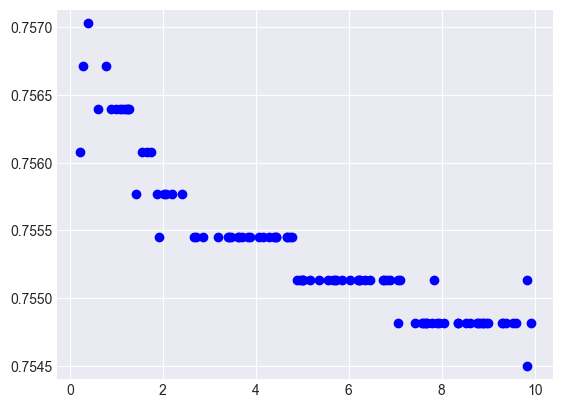

In [23]:
out = pd.DataFrame(log_random.cv_results_)
plt.ylim(out['mean_test_score'].min()-0.0001, out['mean_test_score'].max()+0.0001)
plt.scatter(out['param_C'], out['mean_test_score'], c='blue')

grid search (to focus on small values + include the calibration in the fit)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

prec_scorer = make_scorer(metrics.accuracy_score)
# other possibilities are metrics.recall_score, metrics.average_precision, ...

C = [x for x in np.linspace(start = 0.0001, stop = 1, num = 50)]

random_grid = {'C': C}

# The object to fit the model
logreg_balanced = LogisticRegression( max_iter=1000) 

# object for the randomised search
log_grid = GridSearchCV(estimator = logreg_balanced, param_grid = random_grid,
                                scoring=prec_scorer  , cv = 3, verbose=2,  n_jobs=-1)
isotonic_log = CalibratedClassifierCV(log_grid, cv=3, method='isotonic')

#Fitting model (model+ calibration)
isotonic_log.fit(X_train_poly, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3,
                                              estimator=LogisticRegression(max_iter=1000),
                                              n_jobs=-1,
                                              param_grid={'C': [0.0001,
                                                                0.02050612244897959,
                                                                0.04091224489795919,
                                                                0.06131836734693878,
                                                                0.08172448979591837,
                                                                0.10213061224489796,
                                                                0.12253673469387756,
                                                                0.14294285714285712,
                                                                0.16334897959183672,
                                                                0.18375510204081633,
                                                                0.2041612244897959,
                                                                0.224567346938775...
                                                                0.30619183673469386,
                                                                0.32659795918367346,
                                                                0.34700408163265306,
                                                                0.36741020408163266,
                                                                0.3878163265306122,
                                                                0.4082224489795918,
                                                                0.4286285714285714,
                                                                0.449034693877551,
                                                                0.4694408163265306,
                                                                0.4898469387755102,
                                                                0.5102530612244898,
                                                                0.5306591836734694,
                                                                0.551065306122449,
                                                                0.5714714285714285,
                                                                0.5918775510204082, ...]},
                                              scoring=make_scorer(accuracy_score),
                                              verbose=2),
                       method='isotonic')

### evaluation

In [25]:
isotonic_log.score(X_val_poly, y_val)

0.73989898989899

In [26]:
y_pred_poly = isotonic_log.predict(X_val_poly)
print(classification_report(y_val, y_pred_poly))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       577
           1       0.61      0.12      0.20       215

    accuracy                           0.74       792
   macro avg       0.68      0.54      0.52       792
weighted avg       0.71      0.74      0.67       792



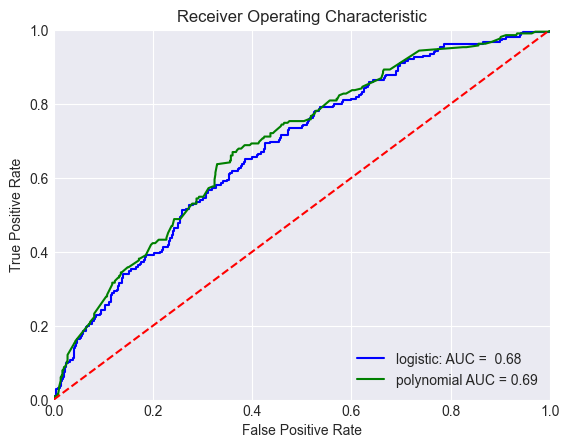

In [27]:
# calculate the fpr and tpr for all thresholds of the classification
preds = y_val_pred_prob[:,1]
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN classifier

Perform KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = np.arange(1,30)
param_grid = {'n_neighbors': n_neighbors}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring=prec_scorer ,cv=3,  verbose=2, n_jobs=-1)

grid_search.fit(X_train_stand, y_train)
grid_search.best_params_

Fitting 3 folds for each of 29 candidates, totalling 87 fits


{'n_neighbors': 24}

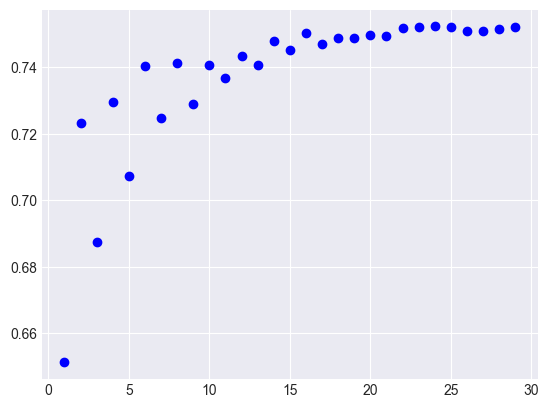

In [29]:
out2 = pd.DataFrame(grid_search.cv_results_)
xlabel_names = ['n_neighbors']
plt.scatter(out2['param_n_neighbors'], out2['mean_test_score'], c='blue')

evaluation

In [30]:
y_pred_knn = grid_search.predict(X_val_stand)
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.98      0.84       577
           1       0.43      0.04      0.08       215

    accuracy                           0.72       792
   macro avg       0.58      0.51      0.46       792
weighted avg       0.65      0.72      0.63       792



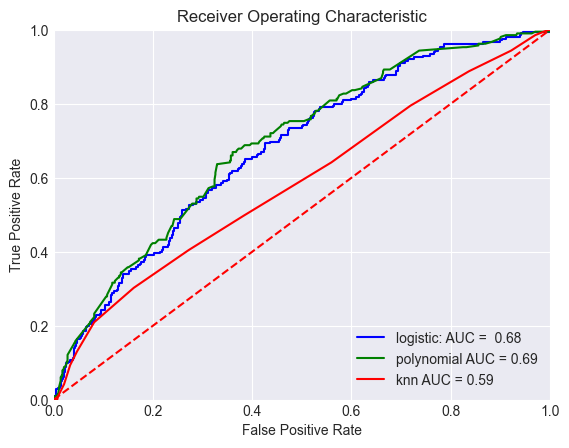

In [31]:
preds = y_val_pred_prob[:,1]
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]
preds_knn = grid_search.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SMOTE

Deal with the unbalance

In [37]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.8, random_state=1703)
under = RandomUnderSampler(sampling_strategy=1)
pipeline = Pipeline([('o', over), ('u', under)])

X_train_smote, y_train_smote = pipeline.fit_resample(X_train_stand.copy(), y_train.copy())
X_val_smote, y_val_smote = pipeline.fit_resample(X_trainval_stand.copy(), y_train_val.copy())
np.bincount(y_val_smote)

array([2359, 2359], dtype=int64)

Redo the grid search, but on the balanced data and calibrate the model

In [43]:
# We use KNNImputer to fill in the NaN values because KNeighborsClassifier does not accept missing values encoded as NaN natively.
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

# Impute the missing values in X_train_smote
X_train_smote = imputer.fit_transform(X_train_smote)

In [44]:
n_neighbors = np.arange(1,5)
param_grid = {'n_neighbors': n_neighbors}

knn_b = KNeighborsClassifier( )
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 3,  verbose=2, n_jobs = -1)
isotonic_knn = CalibratedClassifierCV(grid_search_knn, cv=3, method='isotonic')


isotonic_knn.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3,
                                              estimator=KNeighborsClassifier(),
                                              n_jobs=-1,
                                              param_grid={'n_neighbors': array([1, 2, 3, 4])},
                                              scoring=make_scorer(accuracy_score),
                                              verbose=2),
                       method='isotonic')

re-evalute

In [45]:
y_pred_knn_b = isotonic_knn.predict(X_val_stand)
print(classification_report(y_val, y_pred_knn_b))

c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.74      0.72      0.73       577
           1       0.30      0.32      0.31       215

    accuracy                           0.61       792
   macro avg       0.52      0.52      0.52       792
weighted avg       0.62      0.61      0.61       792



c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


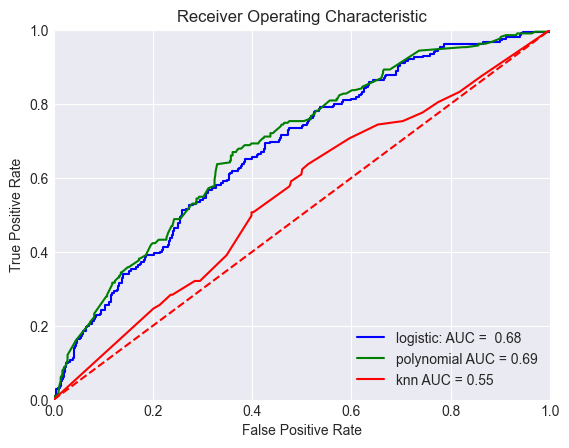

In [46]:
preds_knn_b = isotonic_knn.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# gradient boosting

Randomized search

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 100, stop = 250, num = 50)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
learning_rate = [round(x,5) for x in np.linspace(start = 0.001, stop = 1.5, num = 50)]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train_smote, y_train_smote)
gbm_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 155,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'log2',
 'max_depth': 10,
 'learning_rate': 0.12337}

Evaluate

In [48]:
y_pred_gbm = gbm_random.predict(X_val_stand)
print(classification_report(y_val, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       577
           1       0.45      0.31      0.37       215

    accuracy                           0.71       792
   macro avg       0.61      0.58      0.59       792
weighted avg       0.68      0.71      0.69       792



c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Scatterplot

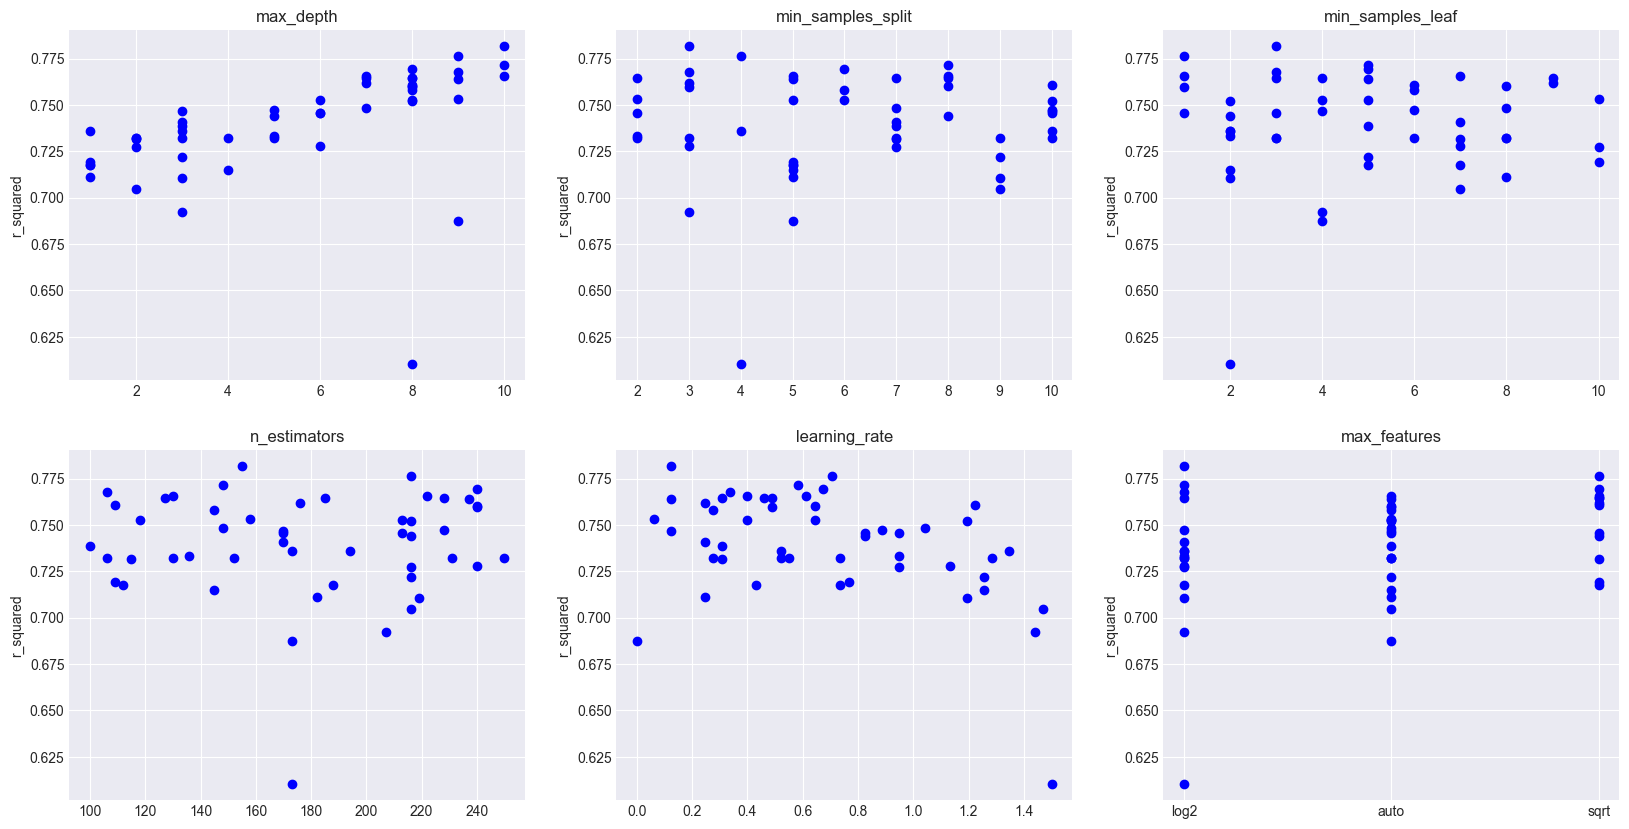

In [50]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_learning_rate','param_max_features']

fig, axs = plt.subplots(2,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('learning_rate')

axs[1,2].scatter(out2['param_max_features'], out2['mean_test_score'], c='blue');
axs[1,2].set_title('max_features')

for ax in axs.flat: ax.set(ylabel='r_squared')

Grid search and calibration

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

n_estimators = [int(x) for x in np.linspace(150, 160, num = 3)]
learning_rate = [x for x in np.linspace(0.1, 0.2, num = 3)]
max_features = ['log2']
max_depth = [10,11]
min_samples_split = [2,3]
min_samples_leaf = [3,10,11]
                                            
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_gbm = CalibratedClassifierCV(gbm_grid, cv=3, method='isotonic')
isotonic_gbm.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3,
                                              estimator=GradientBoostingClassifier(),
                                              n_jobs=-1,
                                              param_grid={'learning_rate': [0.1,
                                                                            0.15000000000000002,
                                                                            0.2],
                                                          'max_depth': [10, 11],
                                                          'max_features': ['log2'],
                                                          'min_samples_leaf': [3,
                                                                               10,
                                                                               11],
                                                          'min_samples_split': [2,
                                                                                3],
                                                          'n_estimators': [150,
                                                                           155,
                                                                           160]},
                                              verbose=2),
                       method='isotonic')

Evaluate

In [52]:
y_pred_gbm = isotonic_gbm.predict(X_val_stand)
print(classification_report(y_val, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       577
           1       0.46      0.17      0.25       215

    accuracy                           0.72       792
   macro avg       0.61      0.55      0.54       792
weighted avg       0.67      0.72      0.67       792



c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


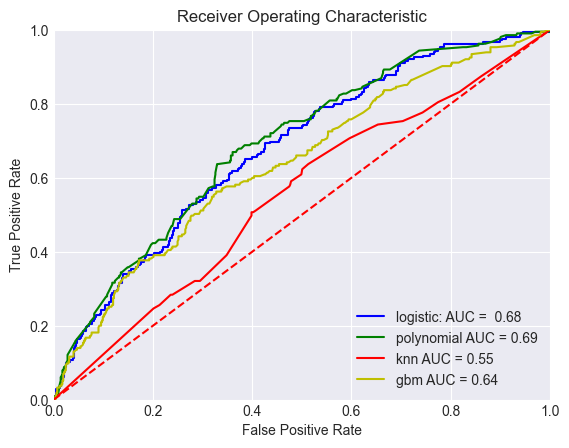

In [53]:
preds_gbm = isotonic_gbm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machines

Randomized search

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

C = [round(x,5) for x in np.linspace(start=0.001, stop=5, num=50)]

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [round(x) for x in np.linspace(start=1, stop=5, num=15)]
gamma = [round(x,5) for x in np.linspace(start=0.001, stop=1, num=50)]

random_grid = {'C': C,
               'kernel': kernel,
               'degree':degree,
               'gamma': gamma}

svc = SVC()
svc_random = RandomizedSearchCV(estimator = svc, param_distributions=random_grid, n_iter=50, cv=3, verbose=2, random_state=4872, n_jobs=-1)
svc_random.fit(X_train_stand, y_train)

print(svc_random.best_params_)
params = svc_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'kernel': 'poly', 'gamma': 0.22527, 'degree': 3, 'C': 0.001}


Evaluate

In [58]:
y_pred_svm = svc_random.predict(X_val_stand)
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84       577
           1       0.53      0.04      0.08       215

    accuracy                           0.73       792
   macro avg       0.63      0.51      0.46       792
weighted avg       0.68      0.73      0.63       792



Scatterplot

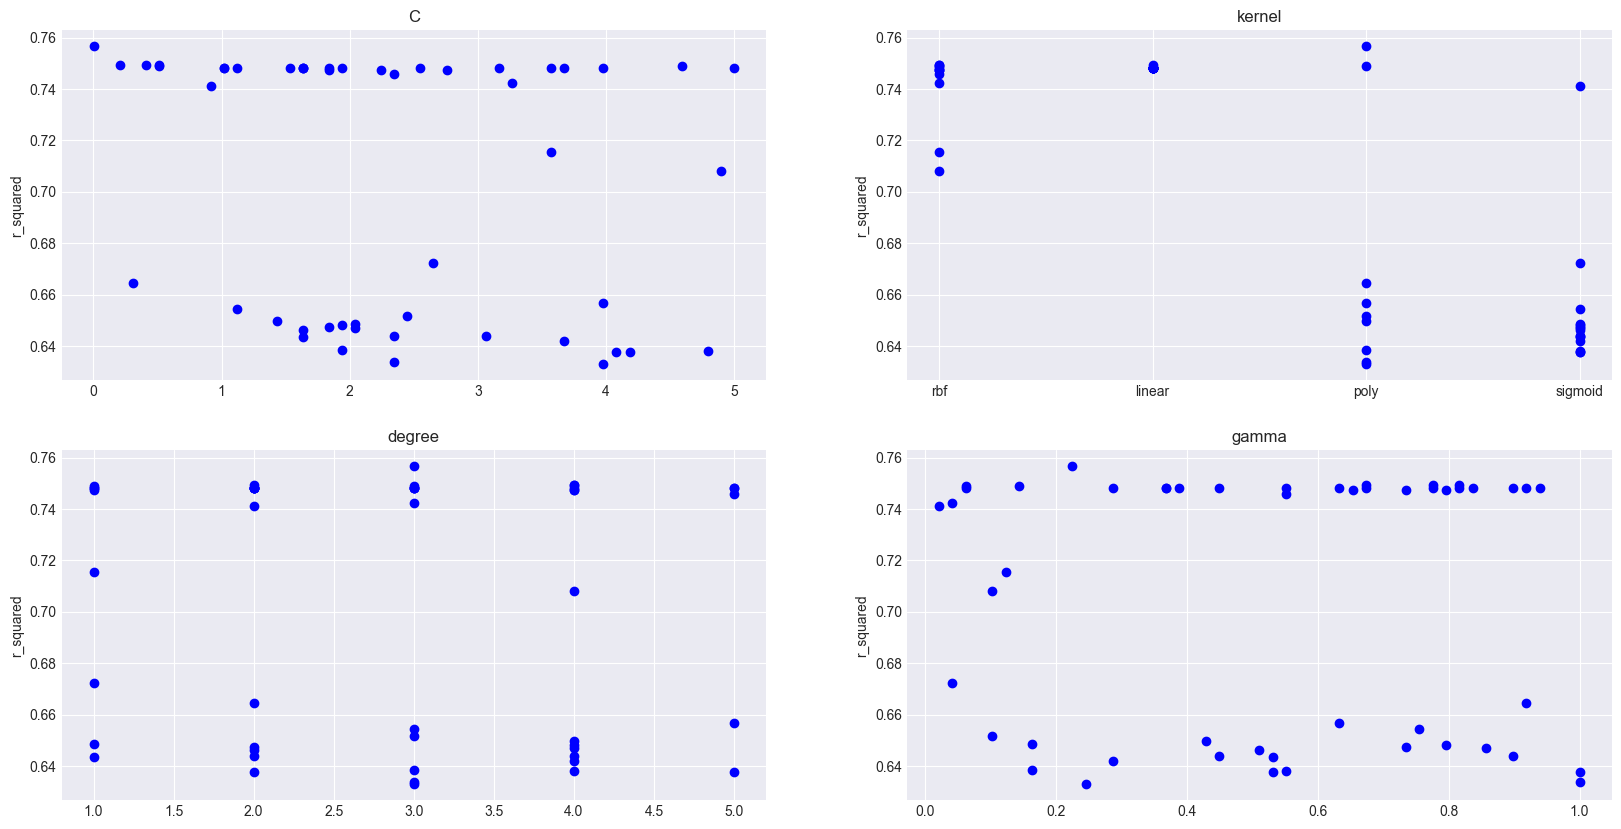

In [59]:
out3 = pd.DataFrame(svc_random.cv_results_)

xlabel_names = ['C',
               'kernel',
               'degree',
               'gamma']

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].scatter(out3['param_C'], out3['mean_test_score'], c='blue')
axs[0,0].set_title('C')

axs[0,1].scatter(out3['param_kernel'], out3['mean_test_score'], c='blue')
axs[0,1].set_title('kernel')

axs[1,0].scatter(out3['param_degree'], out3['mean_test_score'], c='blue')
axs[1,0].set_title('degree')

axs[1,1].scatter(out3['param_gamma'], out3['mean_test_score'], c='blue')
axs[1,1].set_title('gamma')

for ax in axs.flat: ax.set(ylabel='r_squared')

Grid Search & Calibration

In [60]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


C = [round(x,5) for x in np.linspace(start=0.0005, stop=0.0015, num=5)]
kernel = ['poly']
degree = [3]
gamma = [round(x,5) for x in np.linspace(start=0.2, stop=0.3, num=4)]



random_grid = {'C': C,
               'kernel': kernel,
               'degree':degree,
               'gamma': gamma}
svc = SVC()
svc_grid = GridSearchCV(estimator = svc, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_svm = CalibratedClassifierCV(svc_grid, cv=3, method='isotonic')
isotonic_svm.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                                              param_grid={'C': [0.0005, 0.00075,
                                                                0.001, 0.00125,
                                                                0.0015],
                                                          'degree': [3],
                                                          'gamma': [0.2,
                                                                    0.23333,
                                                                    0.26667,
                                                                    0.3],
                                                          'kernel': ['poly']},
                                              verbose=2),
                       method='isotonic')

Evaluate

In [61]:
y_pred_svm = isotonic_svm.predict(X_val_stand)
print(classification_report(y_val, y_pred_svm))

c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.80      0.72      0.76       577
           1       0.41      0.51      0.45       215

    accuracy                           0.67       792
   macro avg       0.60      0.62      0.61       792
weighted avg       0.69      0.67      0.68       792



# Evaluation

c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


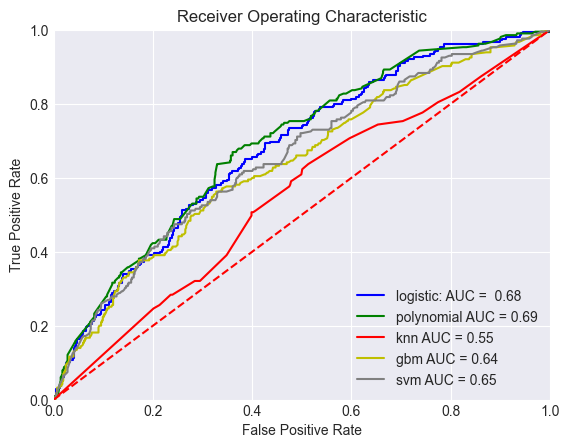

In [63]:
preds_svm = isotonic_svm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)
fpr_s, tpr_s, threshold = metrics.roc_curve(y_val, preds_svm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)
roc_auc_s = metrics.auc(fpr_s, tpr_s)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)
plt.plot(fpr_s, tpr_s, 'grey', label = 'svm AUC = %0.2f' % roc_auc_s)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### On the graph above you can see that **Polynomial** has the best score

In [64]:
# refitting using the best model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

prec_scorer = make_scorer(metrics.accuracy_score)

C = [x for x in np.linspace(start=0.0001, stop=1, num=50)]

random_grid = {'C': C}

logreg_balanced = LogisticRegression(max_iter=1000) 

log_grid = GridSearchCV(estimator=logreg_balanced, param_grid=random_grid, scoring=prec_scorer, cv=3, verbose=2,  n_jobs=-1)
isotonic_log = CalibratedClassifierCV(log_grid, cv=3, method='isotonic')

#Fitting model (model + calibration)
isotonic_log.fit(X_val, y_val)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\Victo\.virtualenvs\SchoolProject-jfK-57_F\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3,
                                              estimator=LogisticRegression(max_iter=1000),
                                              n_jobs=-1,
                                              param_grid={'C': [0.0001,
                                                                0.02050612244897959,
                                                                0.04091224489795919,
                                                                0.06131836734693878,
                                                                0.08172448979591837,
                                                                0.10213061224489796,
                                                                0.12253673469387756,
                                                                0.14294285714285712,
                                                                0.16334897959183672,
                                                                0.18375510204081633,
                                                                0.2041612244897959,
                                                                0.224567346938775...
                                                                0.30619183673469386,
                                                                0.32659795918367346,
                                                                0.34700408163265306,
                                                                0.36741020408163266,
                                                                0.3878163265306122,
                                                                0.4082224489795918,
                                                                0.4286285714285714,
                                                                0.449034693877551,
                                                                0.4694408163265306,
                                                                0.4898469387755102,
                                                                0.5102530612244898,
                                                                0.5306591836734694,
                                                                0.551065306122449,
                                                                0.5714714285714285,
                                                                0.5918775510204082, ...]},
                                              scoring=make_scorer(accuracy_score),
                                              verbose=2),
                       method='isotonic')

In [72]:
# load dataset
score_cleaned = pd.read_csv('score_cleaned.csv')

# if the columns exists, remove it. This is to ensure when rerunning this cel, it doesn't break

if "outcome_damage_inc" in score_cleaned.columns:
	score_cleaned.drop("outcome_damage_inc", axis=1, inplace=True)

# if the column doesn't exist, perform the prediction and add the result to the column

if "outcome_damage_inc" not in score_cleaned.columns:

	# predict on the fitted model
	y_pred = isotonic_log.predict(X_test)

	y_pred_str = ['yes' if y == 1 else 'no' for y in y_pred]

 
	# adding the outcome_damage_inc column with the predicted outcome
	# again the X_test_stand returns 900+ rows, but I only need 496, so the first 496 will be used

	score_cleaned['outcome_damage_inc'] = y_pred_str[:496]
	score_cleaned.to_csv('score_cleaned.csv', index=False)
